In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from data import get_mnist


w = weights, b = bias, i = input, h = hidden, o = output, l = label
e.g. w_i_h = weights from input layer to hidden layer

Epoch: 1/3
Acc: 86.4%
Epoch: 2/3
Acc: 92.08%
Epoch: 3/3
Acc: 93.18%


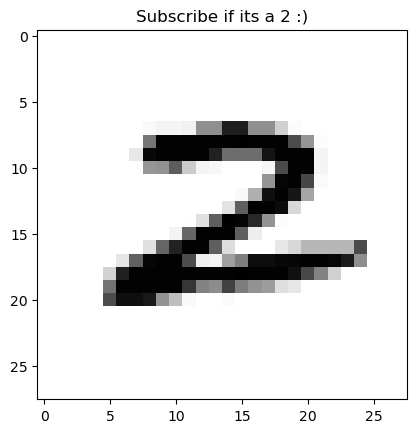

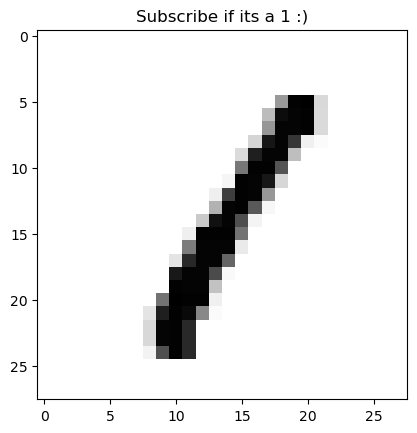

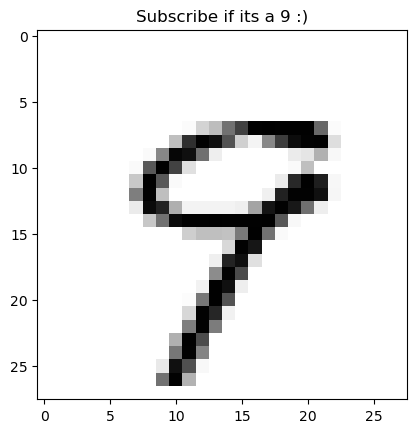

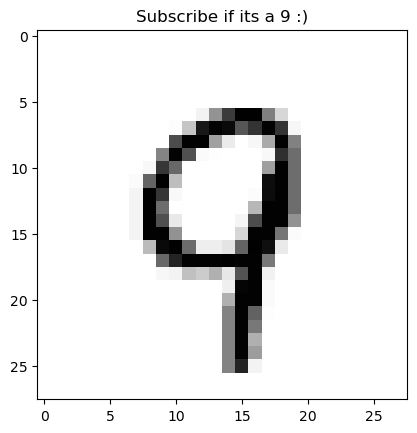

ValueError: invalid literal for int() with base 10: ''

In [6]:
images, labels = get_mnist()

w_i_h = np.random.uniform(-0.5, 0.5, (20, 784))
w_h_o = np.random.uniform(-0.5, 0.5, (10, 20))
b_i_h = np.zeros((20, 1))
b_h_o = np.zeros((10, 1))

# training
learn_rate = 0.01
nr_correct = 0
epochs = 3
# how often we go through each image
epochs = 3
for epoch in range(epochs):
    # going through each image, label pair
    for img, l in zip(images, labels):
        # changes the shape of the img from a vector with size 784 to a matrix (784 * 1)
        img.shape += (1,)
        # changes the label from a vector with size 10 to a matrix (10 * 1)
        l.shape += (1,)
        
        # forward propagation input -> hidden and activation function (normalizing)  
        h_pre = (w_i_h @ img) + b_i_h
        h = 1 / (1 + np.exp(-h_pre))
        # forward propagation hidden -> output and activation function (normalizing)
        o_pre = (w_h_o @ h) + b_h_o
        o = 1 / (1 + np.exp(-o_pre))

        # cost (error) calculation
        error = 1 / len(o) * np.sum((o - l) ** 2, axis=0)
        # how many it got correct?
        nr_correct += np.sum(np.argmax(o, axis=0) == np.argmax(l, axis=0))
        
        # backward propagation output -> hidden (cost function derivative) 
        delta_o = o - l
        w_h_o += -learn_rate * delta_o @ np.transpose(h)
        b_h_o += -learn_rate * delta_o
        # backward propagation hidden -> input (activation function derivative)
        delta_h = np.transpose(w_h_o) @ delta_o * (h * (1 - h))
        w_i_h += -learn_rate * delta_h @ np.transpose(img)
        b_i_h += -learn_rate * delta_h

    # show the epoch
    print(f"Epoch: {epoch + 1}/{epochs}")

    # show accuracy for this epoch
    print(f"Acc: {round((nr_correct / images.shape[0]) * 100, 2)}%")
    nr_correct = 0

# Show results
while True:
    index = int(input("Enter a number (0 - 59999): "))
    img = images[index]
    plt.imshow(img.reshape(28, 28), cmap="Greys")

    img.shape += (1,)
    # Forward propagation input -> hidden
    h_pre = b_i_h + w_i_h @ img.reshape(784, 1)
    h = 1 / (1 + np.exp(-h_pre))
    # Forward propagation hidden -> output
    o_pre = b_h_o + w_h_o @ h
    o = 1 / (1 + np.exp(-o_pre))

    plt.title(f"its a {o.argmax()} :)")
    plt.show()